In [28]:
#Khởi tạo models 

import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense,Activation,Dropout,Conv2D,MaxPooling2D,Flatten
from keras.models import  Sequential
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import pandas as pd
from tensorflow.keras.models import load_model

#import cv2  # import openCV
#cv2.__version__

In [29]:
from google.colab import drive
drive.mount('/content/drive/')
train_dataset = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
horizontal_flip=True)
validation_dataset = ImageDataGenerator(rescale=1./255)
test_dataset = ImageDataGenerator(rescale=1./255)

training_generator = train_dataset.flow_from_directory(
                      '/content/drive/MyDrive/Colab Notebooks/Fruit/train',
                        target_size=(60, 60),
                        batch_size=50,
                        class_mode="categorical")
validation_generator = validation_dataset.flow_from_directory(
                        "/content/drive/MyDrive/Colab Notebooks/Fruit/test",
                         target_size=(60, 60),
                          batch_size=50,
                          
                         class_mode="categorical")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
Found 4788 images belonging to 10 classes.
Found 1606 images belonging to 10 classes.


In [30]:
training_generator.class_indices

{'Banana': 0,
 'Cherry 1': 1,
 'Corn': 2,
 'Limes': 3,
 'Mandarine': 4,
 'Raspberry': 5,
 'Strawberry': 6,
 'Watermelon': 7,
 'qua_mo': 8,
 'quả_bơ': 9}

In [ ]:
names= ['Banana','cherry','corn','limes','mandarine']

In [31]:

model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same', input_shape=(60,60,3)))
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
#model.add(Dropout(0.3))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.1))
model.add(Dense(10,activation='softmax'))

#compiling the model..
#from tensorflow.keras.optimizers import SGD
#opt = SGD(lr=0.01, momentum=0.9)
#from keras.backend import categorical_crossentropy
#model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
#model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()
from tensorflow.keras.optimizers import Adam
opt = Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 60, 60, 32)        896       
                                                                 
 conv2d_21 (Conv2D)          (None, 60, 60, 32)        9248      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 30, 30, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 30, 30, 64)        18496     
                                                                 
 conv2d_23 (Conv2D)          (None, 30, 30, 64)        36928     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 15, 15, 64)       0         
 g2D)                                                 

In [32]:
history = model.fit(training_generator,batch_size=128,epochs=5,verbose=1,validation_data=validation_generator)


Epoch 1/5
96/96 [==============================] - 727s 8s/step - loss: 0.6890 - accuracy: 0.8143 - val_loss: 6.5549 - val_accuracy: 0.5162
Epoch 2/5
96/96 [==============================] - 15s 157ms/step - loss: 0.0240 - accuracy: 0.9916 - val_loss: 9.3158 - val_accuracy: 0.5286
Epoch 3/5
96/96 [==============================] - 15s 155ms/step - loss: 0.0161 - accuracy: 0.9946 - val_loss: 9.6119 - val_accuracy: 0.5455
Epoch 4/5
96/96 [==============================] - 15s 156ms/step - loss: 0.0162 - accuracy: 0.9954 - val_loss: 10.0190 - val_accuracy: 0.5467
Epoch 5/5
96/96 [==============================] - 15s 156ms/step - loss: 0.0044 - accuracy: 0.9990 - val_loss: 12.7094 - val_accuracy: 0.5374


In [34]:
model.save('/content/drive/MyDrive/Colab Notebooks/CNN_fruit.h5')

In [35]:
from keras.models import load_model
model=load_model('/content/drive/MyDrive/Colab Notebooks/CNN_fruit.h5')

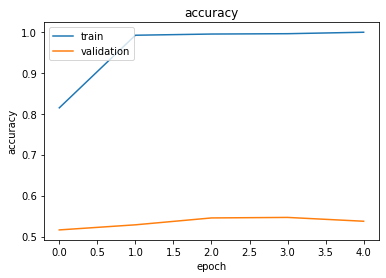

In [36]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()

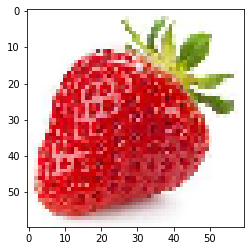

In [43]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
img=load_img('dau.jpeg',target_size=(60,60,3))
plt.imshow(img)

In [44]:
img=img_to_array(img)  # tạo mảng
#img = img[:,:,0]  #hinh test là 3 màu RGB, nhưng tâp train là 1 màu xám
img=img.reshape(1,60,60,3)
img=img.astype('float32')
img=img/255
import numpy as np
np.argmax(model.predict(img),axis=1)   #vi tri so 46


array([6])

In [41]:
training_generator.class_indices

{'Banana': 0,
 'Cherry 1': 1,
 'Corn': 2,
 'Limes': 3,
 'Mandarine': 4,
 'Raspberry': 5,
 'Strawberry': 6,
 'Watermelon': 7,
 'qua_mo': 8,
 'quả_bơ': 9}